# Week 1 ML - Lab
# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import pandas as pd. Import seaborn as sns**

In [9]:
import pandas as pd
import seaborn as sns

**Read _Salaries.csv_ as a dataframe called sal.**

In [57]:
# sal = 
sal = pd.read_csv('Salaries.csv')

**Check the head of the DataFrame.**

In [11]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [2]:
# Your code here


**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [15]:
sal['JobTitle'][sal['EmployeeName'] == 'JOSEPH DRISCOLL']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [3]:
# Now try to select Employes who have name "GARY JIMENEZ"
# Your code here


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [16]:
sal['TotalPayBenefits'][sal['EmployeeName'] == 'JOSEPH DRISCOLL']

24    270324.91
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [17]:
sal['EmployeeName'][sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [19]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [22]:
sal.groupby('Year').mean()[['BasePay', 'TotalPayBenefits']]

,BasePay,TotalPayBenefits
Year,,
2011,63595.956517,71744.103871
2012,65436.406857,100553.229232
2013,69630.030216,101440.519714
2014,66564.421924,100250.918884


**How many unique job titles are there?**

Keyword: _unique, nunique_

In [25]:
sal['JobTitle'].nunique()

2159

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [28]:
sal['JobTitle'].value_counts(ascending=True).tail()

Police Officer 3                2421
Public Svc Aide-Public Works    2518
Registered Nurse                3736
Special Nurse                   4389
Transit Operator                7036
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [33]:
sum(sal['JobTitle'][sal['Year'] == 2013].value_counts() == 1)

202

**How many people have the word Chief in their job title?**

In [36]:
sum(sal['JobTitle'].str.lower().str.contains('chief'))

627

In [39]:
def check_chief(title):
    if 'chief' in title.lower():
        return True
    else:
        return False
sum(sal['JobTitle'].apply(check_chief))

627

## Data Visualization

**Implement seaborn's countplot with x='Year'**

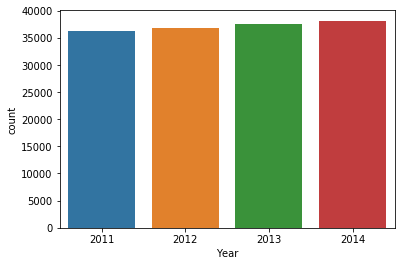

In [40]:
sns.countplot(x='Year', data=sal)

**Implement seaborn's distplot for BasePay of Year 2011**

/Users/minhdh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


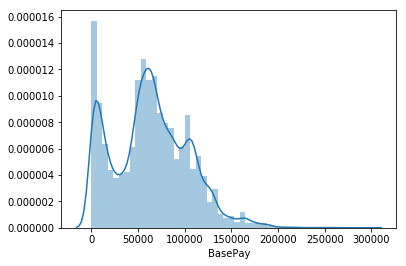

In [41]:
sns.distplot(sal[sal['Year'] == 2011]['BasePay'])

**How about other Year**

/Users/minhdh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


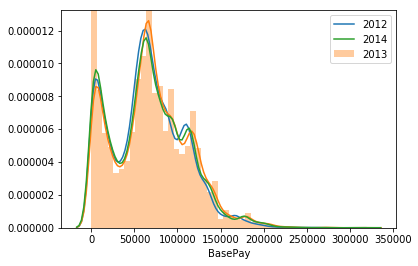

In [44]:
sal['BasePay'] = sal['BasePay'].fillna(sal['BasePay'].mean())
sns.distplot(sal[sal['Year'] == 2012]['BasePay'], hist=False, label="2012")
sns.distplot(sal[sal['Year'] == 2013]['BasePay'], hist=True, label="2013")
sns.distplot(sal[sal['Year'] == 2014]['BasePay'], hist=False, label="2014")

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

In [64]:
top_5 = sal['JobTitle'].value_counts().head().index
report = sal[sal['JobTitle'].isin(top_5)].groupby('JobTitle').mean()[['BasePay', 'Benefits', 'OvertimePay']]

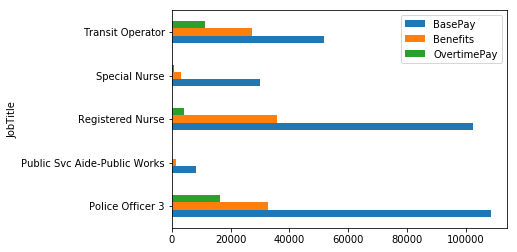

In [67]:
report.plot(kind='barh')

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**
Keyword: _corr_

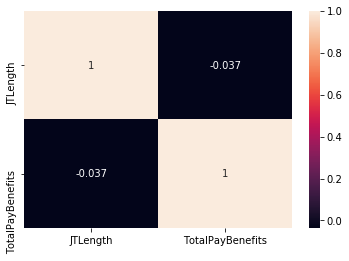

In [73]:
sal['JTLength'] = sal['JobTitle'].apply(len)

sns.heatmap(sal[['JTLength', 'TotalPayBenefits']].corr(), annot=True)

# Great Job!